Simple DNN model using composite indicator as an input and optimal max-shape portfolio for the next period as an output

## Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
import os
os.chdir(os.path.expanduser('../data'))

from dotenv import load_dotenv
load_dotenv()

from DataProvider import DataProvider

In [3]:
data_provider = DataProvider()

df_countries, benchmark = data_provider.get_etf_data()
acwi_weights = data_provider.get_acwi_weights()

In [4]:
days_to_recalculate = data_provider.get_days_to_recalculate()

# Start after 1 year to have enough historic data for first calculated period
days_to_recalculate = days_to_recalculate.iloc[12:]
days_to_recalculate = pd.DatetimeIndex(days_to_recalculate)
days_to_recalculate

DatetimeIndex(['2000-01-04', '2000-02-04', '2000-03-06', '2000-04-04',
               '2000-05-04', '2000-06-06', '2000-07-05', '2000-08-04',
               '2000-09-06', '2000-10-04',
               ...
               '2023-03-03', '2023-04-06', '2023-05-04', '2023-06-06',
               '2023-07-06', '2023-08-03', '2023-09-06', '2023-10-05',
               '2023-11-03', '2023-12-05'],
              dtype='datetime64[ns]', name='Days to rebalance', length=288, freq=None)

In [5]:
x = []
for date in days_to_recalculate:
    indicators = data_provider.calculate_composite_indicator(
        date, periods=6)
    x.append(indicators.values)

x = np.array(x)
x.shape

(288, 6, 27)

In [6]:
os.chdir(os.path.expanduser('..'))

from PortfolioOptimizer import PortfolioOptimizer

In [43]:
y = []
for i in range(0,len(days_to_recalculate)):
    if i == len(days_to_recalculate) - 1:
        data_period = df_countries.loc[
            days_to_recalculate[i]:]
    else:
        data_period = df_countries.loc[
            days_to_recalculate[i]:days_to_recalculate[i+1]]
    i += 1

    year_str = str(data_period.index[0].year)
    acwi_weights_year = acwi_weights.loc[year_str]

    optimizer = PortfolioOptimizer()
    optimal_portfolio = optimizer.get_optimal_portfolio(
        data_period, acwi_weights_year)
    y.append(optimal_portfolio.values)

y = np.array(y)
y.shape

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


(288, 27)

## Splitting data into 80% test, 10% validation and 10% test

In [8]:
val_split = int(0.8 * x.shape[0])
test_split = int(0.9 * x.shape[0])

In [9]:
# Train
dates_for_training = days_to_recalculate[:val_split]
print(dates_for_training)

x_train = x[:val_split]
print(x_train.shape)
y_train = y[:val_split]
print(y_train.shape)

DatetimeIndex(['2000-01-04', '2000-02-04', '2000-03-06', '2000-04-04',
               '2000-05-04', '2000-06-06', '2000-07-05', '2000-08-04',
               '2000-09-06', '2000-10-04',
               ...
               '2018-05-04', '2018-06-05', '2018-07-06', '2018-08-03',
               '2018-09-05', '2018-10-04', '2018-11-06', '2018-12-06',
               '2019-01-10', '2019-02-08'],
              dtype='datetime64[ns]', name='Days to rebalance', length=230, freq=None)
(230, 6, 27)
(230, 27)


In [10]:
# Validation
dates_for_validation = days_to_recalculate[val_split:test_split]
print(dates_for_validation)

x_val = x[val_split:test_split]
print(x_val.shape)
y_val = y[val_split:test_split]
print(y_val.shape)

DatetimeIndex(['2019-03-05', '2019-04-04', '2019-05-07', '2019-06-05',
               '2019-07-05', '2019-08-06', '2019-09-04', '2019-10-04',
               '2019-11-05', '2019-12-04', '2020-01-09', '2020-02-05',
               '2020-03-04', '2020-04-03', '2020-05-06', '2020-06-03',
               '2020-07-07', '2020-08-05', '2020-09-03', '2020-10-07',
               '2020-11-04', '2020-12-03', '2021-01-06', '2021-02-03',
               '2021-03-03', '2021-04-08', '2021-05-05', '2021-06-03',
               '2021-07-07'],
              dtype='datetime64[ns]', name='Days to rebalance', freq=None)
(29, 6, 27)
(29, 27)


In [11]:
# Test
dates_for_test = days_to_recalculate[test_split:]
print(dates_for_test)

x_test = x[test_split:]
print(x_test.shape)
y_test = y[test_split:]
print(y_test.shape)

DatetimeIndex(['2021-08-04', '2021-09-03', '2021-10-06', '2021-11-03',
               '2021-12-03', '2022-01-11', '2022-02-08', '2022-03-04',
               '2022-04-06', '2022-05-06', '2022-06-07', '2022-07-06',
               '2022-08-03', '2022-09-07', '2022-10-06', '2022-11-03',
               '2022-12-06', '2023-01-09', '2023-02-03', '2023-03-03',
               '2023-04-06', '2023-05-04', '2023-06-06', '2023-07-06',
               '2023-08-03', '2023-09-06', '2023-10-05', '2023-11-03',
               '2023-12-05'],
              dtype='datetime64[ns]', name='Days to rebalance', freq=None)
(29, 6, 27)
(29, 27)


## Auxiliary functions

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import L2

In [37]:
def show_loss(hd):
    epochs = range(1, len(hd['loss'])+1)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, hd['loss'], "r", label="train")
    plt.plot(epochs, hd['val_loss'], "b", label="valid")
    plt.grid(True)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, hd['loss'], "r", label="train")
    plt.plot(epochs, hd['val_loss'], "b", label="valid")
    plt.grid(True)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.title("Loss log")
    plt.legend()
    plt.show()

In [38]:
def train_and_evaluate_model(model, epochs=200, learning_rate=1e-3,
                             with_early_stopping=False):
    start_time = time.time()

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='mean_squared_error')
    model.summary()
    print()

    callbacks = []
    if with_early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', 
                                       patience=100))

    callbacks.append(ReduceLROnPlateau(monitor='val_loss', 
                                       patience=50, min_lr=1e-6))
    
    hist = model.fit(x_train, y_train,
                     validation_data=(x_val, y_val),
                     epochs=epochs,
                     callbacks=callbacks)

    train_error = model.evaluate(x_train, y_train, verbose=0)
    print('Train error:', train_error)

    val_error = model.evaluate(x_val, y_val, verbose=0)
    print('Val error:', val_error)

    test_error = model.evaluate(x_test, y_test, verbose=0)
    print('Test error:', test_error)

    print('Execution time', round(time.time() - start_time, 2), 'seconds')

    show_loss(hist.history)

## Simple DNN Model

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 162)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        41,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 27)             │         6,939 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,667 (190.11 KB)

 Trainable params: 48,667 (190.11 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/200


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 37.8085 - val_loss: 32.2807 - learning_rate: 0.0010
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.6784 - val_loss: 25.9739 - learning_rate: 0.0010
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.6291 - val_loss: 20.7026 - learning_rate: 0.0010
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.5932 - val_loss: 16.3660 - learning_rate: 0.0010
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.4628 - val_loss: 12.8429 - learning_rate: 0.0010
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.1146 - val_loss: 10.0087 - learning_rate: 0.0010
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4261 - val_loss: 7.7474 - learning_rate: 0.0010
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.2851 - val_loss: 5.9563 - learning_rate: 0.0010
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.5921 - val_loss: 4.5477 - learning_rate: 0.0010
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━

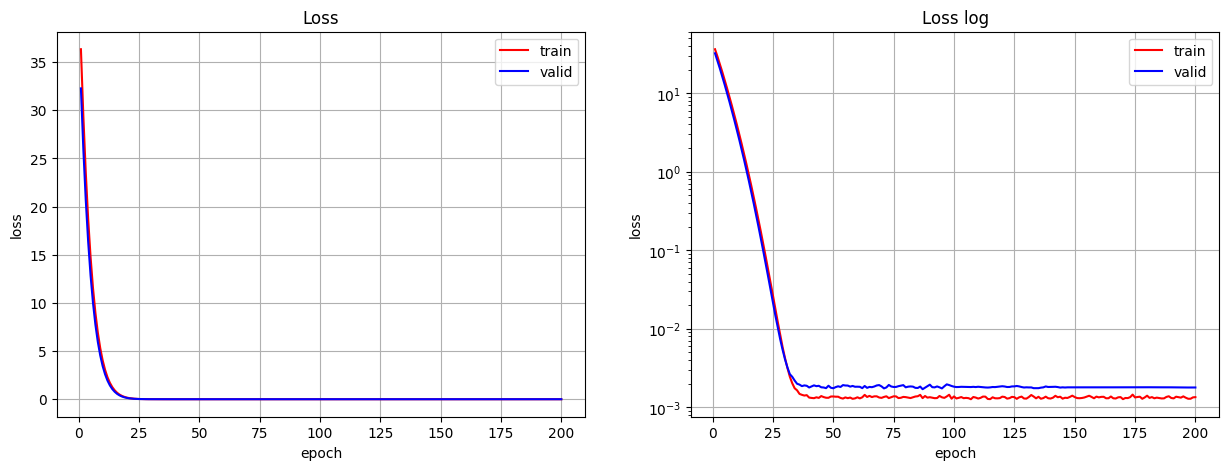

In [39]:
model_lineal = Sequential((
    Flatten(input_shape=x_train.shape[1:]),
    Dense(256, activation='relu', kernel_regularizer=L2(0.2)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_lineal)

In [40]:
predictions = model_lineal.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [41]:
predictions[0].round(3)

array([0.398, 0.084, 0.081, 0.036, 0.03 , 0.035, 0.028, 0.026, 0.014,
       0.013, 0.014, 0.016, 0.015, 0.013, 0.017, 0.012, 0.014, 0.015,
       0.022, 0.014, 0.017, 0.015, 0.015, 0.016, 0.014, 0.013, 0.014],
      dtype=float32)

In [42]:
y_test[0]

array([0.586, 0.124, 0.02 , 0.014, 0.014, 0.012, 0.012, 0.01 , 0.03 ,
       0.006, 0.004, 0.003, 0.003, 0.002, 0.024, 0.002, 0.001, 0.001,
       0.019, 0.009, 0.03 , 0.008, 0.003, 0.03 , 0.002, 0.001, 0.03 ])